<a href="https://colab.research.google.com/github/wjarvis2/DS-Unit-1-Sprint-2-Data-Wrangling/blob/master/Copy_of_LS_DS_123_Reshape_data_LIVE_LESSON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Reshape data

Objectives
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- pandas documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

## Upgrade Seaborn

Run the cell below which upgrades Seaborn and automatically restarts your Google Colab Runtime.

In [0]:
!pip install seaborn --upgrade
import os
os.kill(os.getpid(), 9)

    100% |████████████████████████████████| 215kB 24.2MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


## Hadley Wickham's Examples

From his paper, [Tidy Data](http://vita.had.co.nz/papers/tidy-data.html)

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

"Table 1 provides some data about an imaginary experiment in a format commonly seen in the wild. 

The table has two columns and three rows, and both rows and columns are labelled."

In [13]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


"There are many ways to structure the same underlying data. 

Table 2 shows the same data as Table 1, but the rows and columns have been transposed. The data is the same, but the layout is different."

In [14]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


"Table 3 reorganises Table 1 to make the values, variables and obserations more clear.

Table 3 is the tidy version of Table 1. Each row represents an observation, the result of one treatment on one person, and each column is a variable."

| name         | trt | result |
|--------------|-----|--------|
| John Smith   | a   | -      |
| Jane Doe     | a   | 16     |
| Mary Johnson | a   | 3      |
| John Smith   | b   | 2      |
| Jane Doe     | b   | 11     |
| Mary Johnson | b   | 1      |

## Table 1 --> Tidy

We can use the pandas `melt` function to reshape Table 1 into Tidy format.

In [12]:
tidy = table1.reset_index().melt(id_vars='index')

tidy = tidy.rename(columns={
    'index': 'name',
    'variable': 'trt',
    'value': 'result'
})

tidy.trt = tidy.trt.str.replace('treatment', '')
tidy

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


In [10]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


## Table 2 --> Tidy

In [19]:
tidy2 = table2.reset_index().melt(id_vars='index')

tidy2 = tidy2.rename(columns={
    'index': 'trt',
    'variable': 'name',
    'value': 'result'
})
tidy2.trt = tidy2.trt.str.replace('treatment', '')
tidy2

,trt,name,result
0,a,John Smith,NaN
1,b,John Smith,2.0
2,a,Jane Doe,16.0
3,b,Jane Doe,11.0
4,a,Mary Johnson,3.0
5,b,Mary Johnson,1.0


## Tidy --> Table 1

The `pivot_table` function is the inverse of `melt`.

In [20]:
tidy.pivot_table(index='name', columns='trt', values='result')

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


## Tidy --> Table 2

In [21]:
tidy2.pivot_table(index='trt', columns='name', values='result')

name,Jane Doe,John Smith,Mary Johnson
trt,,,
a,16.0,NaN,3.0
b,11.0,2.0,1.0


## Seaborn uses tidy data



> "[Seaborn will be most powerful when your datasets have a particular organization.](https://seaborn.pydata.org/introduction.html#organizing-datasets) This format ia alternately called “long-form” or “tidy” data and is described in detail by Hadley Wickham. The rules can be simply stated:

> - Each variable is a column
- Each observation is a row

> A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

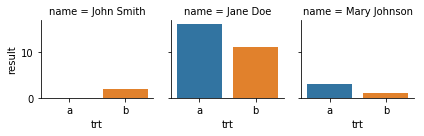

In [22]:
import seaborn as sns

sns.catplot(x='trt', y='result', col='name',
           kind='bar', data=tidy, height=2);

## Load Instacart data

Let's return to the dataset of [3 Million Instacart Orders](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)

If necessary, uncomment and run the cells below to re-download and extract the data

In [23]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-01-16 21:02:28--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.21.165
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.21.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  45.4MB/s    in 4.7s    

2019-01-16 21:02:33 (41.4 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [24]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


Run these cells to load the data

In [25]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [0]:
products = pd.read_csv('products.csv')

order_products = pd.concat([pd.read_csv('order_products__prior.csv'), 
                            pd.read_csv('order_products__train.csv')])

orders = pd.read_csv('orders.csv')

## Goal: Reproduce part of this example

Instead of a plot with 50 products, we'll just do two — the first products from each list
- Half And Half Ultra Pasteurized
- Half Baked Frozen Yogurt

In [27]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
example = Image(url=url, width=600)

display(example)

So, given a `product_name` we need to calculate its `order_hour_of_day` pattern.

## Subset and Merge

In [0]:
a = products[['product_id', 'product_name']]
b = order_products[['order_id', 'product_id']]
c = orders[['order_id', 'order_hour_of_day']]

merged1 = pd.merge(a,b)
merged2 = pd.merge(merged1, c)

In [0]:
product_names = ['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']

In [0]:
condition = ((merged2.product_name=='Half Baked Frozen Yogurt') |
            (merged2.product_name=='Half And Half Ultra Pasteurized'))

condition = merged2.product_name.isin(product_names)

subset = merged2[condition]

## 4 ways to reshape and plot

### 1. value_counts

In [0]:
cream = subset[subset.product_name=='Half And Half Ultra Pasteurized']
froyo = subset[subset.product_name=='Half Baked Frozen Yogurt']

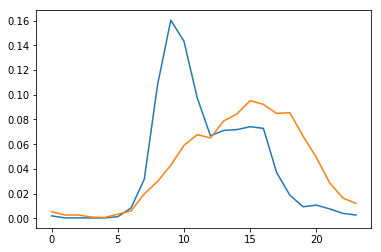

In [36]:
(cream
  .order_hour_of_day
  .value_counts(normalize=True)
  .sort_index()
  .plot())

(froyo
  .order_hour_of_day
  .value_counts(normalize=True)
  .sort_index()
  .plot());

### 2. crosstab

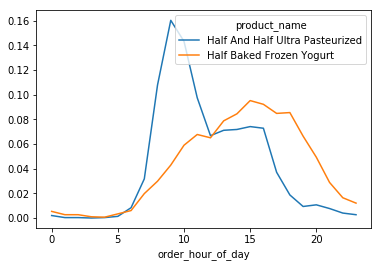

In [38]:
pd.crosstab(subset.order_hour_of_day,
            subset.product_name,
            normalize='columns').plot();

### 3. pivot_table

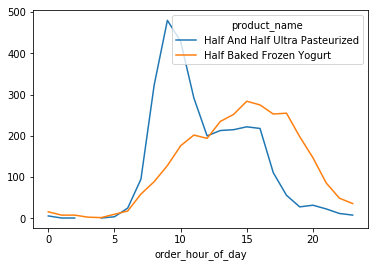

In [39]:
subset.pivot_table(index='order_hour_of_day', 
                  columns='product_name',
                  values='order_id',
                  aggfunc=len).plot();

### 4. melt

In [0]:
table = pd.crosstab(subset.order_hour_of_day,
                   subset.product_name,
                   normalize=True)

In [0]:
melted = (table
         .reset_index()
          .melt(id_vars='order_hour_of_day')
         .rename(columns={
             'order_hour_of_day': 'Hour of Day Ordered',
             'product_name': 'Product',
             'value': 'Percent of Orders by Product'
         }))

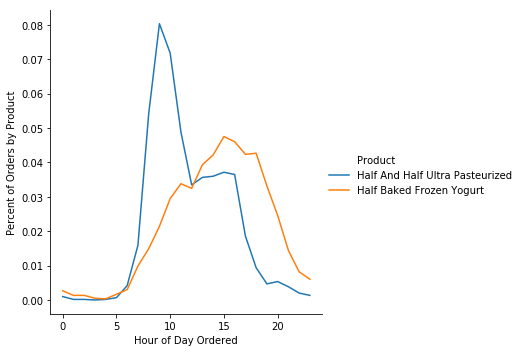

In [45]:
sns.relplot(x='Hour of Day Ordered',
           y='Percent of Orders by Product',
           hue='Product',
           data=melted,
           kind='line');

In [0]:
flights = sns.load_dataset('flights')

In [47]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [0]:
flightmap = flights.pivot_table(index='year',
                   columns='month',
                   values='passengers')

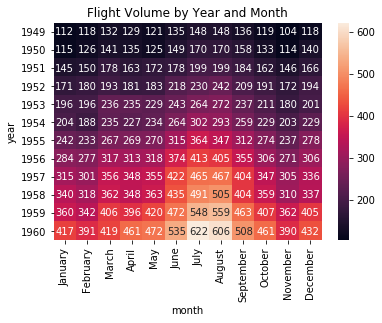

In [71]:
sns.heatmap(flightmap, annot=True, fmt="d").set_title('Flight Volume by Year and Month');

In [0]:
# I know the heatmap I created does not look identical to the example below, but 
# the example below looks like it might be the image from the seaborn documentation,
# which plotted using the pivot function and had the index set to month as opposed
# to year and had the columns set to year rather than month as we were instructed.

# I also added the annotations and formatting just because. 

- Then use seaborn's `heatmap` function to visualize the pivot table. It should look like this:

![](https://seaborn.pydata.org/_images/seaborn-heatmap-4.png)

In [93]:
df = pd.merge(order_products[['order_id', 'product_id']],
             products[['product_id', 'product_name']])

df = pd.merge(df, orders[['order_id', 'order_hour_of_day']])

product_sales = df.product_name.value_counts()

product_sales.head(10)

Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: product_name, dtype: int64

In [0]:
product_times = df.groupby('product_name').order_hour_of_day.mean()

In [0]:
product_times = product_times.reset_index()
product_times.columns = ['product_name', 'average time']

product_sales = product_sales.reset_index()
product_sales.columns = ['product_name', 'total sales']

times_and_sales = pd.merge(product_times, product_sales)

In [0]:
popular = times_and_sales[times_and_sales['total sales'] > 2900]
late_foods = popular.sort_values(by='average time', ascending=False).head(50)
early_foods = popular.sort_values(by='average time', ascending=True).head(50)

In [109]:
late_foods['late']=1
late_foods.head()
early_foods['late']=0
early_foods.head()

,product_name,average time,total sales,late
19078,Half And Half Ultra Pasteurized,11.767279,2995,0
43786,Sweet & Salty Nut Granola Bars Peanut,11.898340,4338,0
36431,Pub Mix,12.004019,4479,0
27754,Nutri Grain Bars Multi Pack,12.049459,3700,0
45631,Trail Mix,12.059043,12601,0


In [112]:
print (late_foods.shape, late_foods.columns)
print (early_foods.shape, early_foods.columns)

(50, 4) Index(['product_name', 'average time', 'total sales', 'late'], dtype='object')
(50, 4) Index(['product_name', 'average time', 'total sales', 'late'], dtype='object')


In [0]:
the_big_one = late_foods.append(early_foods)

Index(['Hour of Day Ordered', 'Product', 'Percent of Orders by Product'], dtype='object')


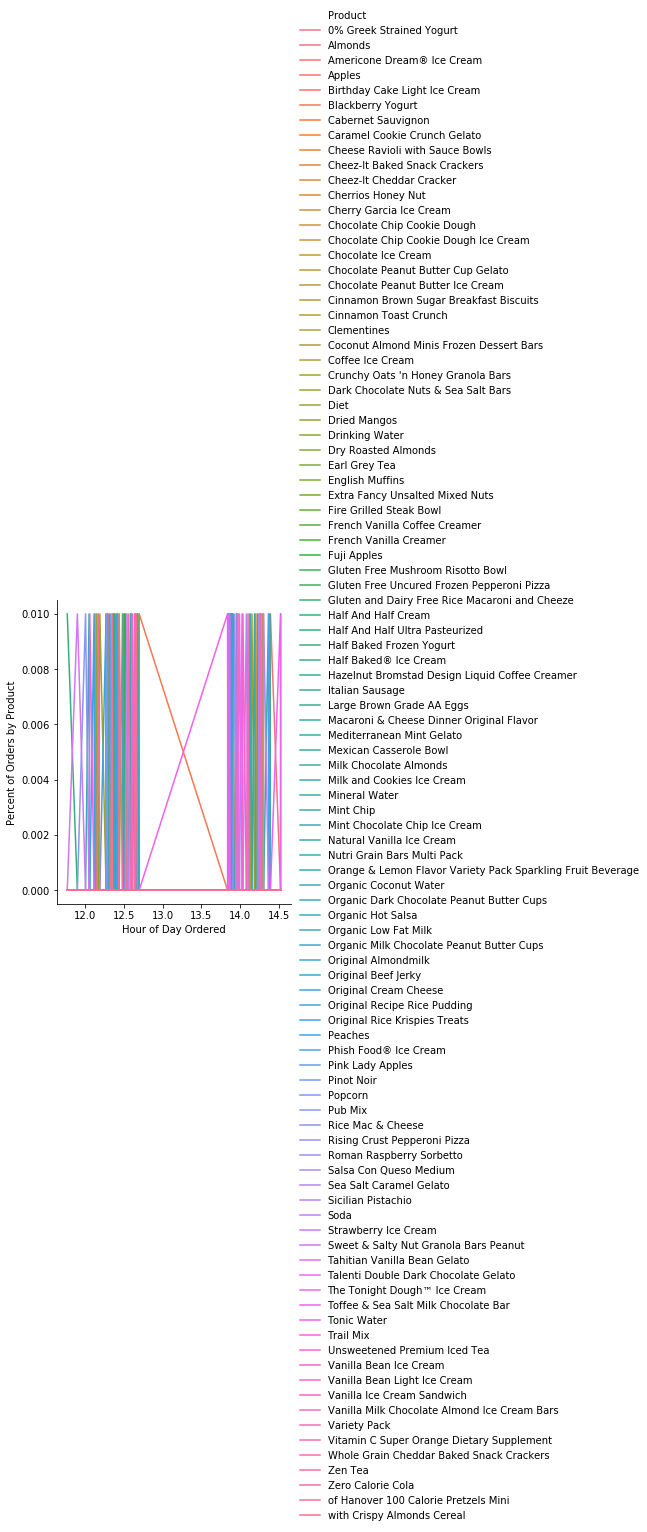

In [126]:
big_table = pd.crosstab(the_big_one['average time'],
                   the_big_one.product_name,
                   normalize=True)

big_melted = (big_table
         .reset_index()
          .melt(id_vars='average time')
         .rename(columns={
             'average time': 'Hour of Day Ordered',
             'product_name': 'Product',
             'value': 'Percent of Orders by Product', 
             'late': 'Late'
         }))
print (big_melted.columns)
sns.relplot(x='Hour of Day Ordered',
           y='Percent of Orders by Product',
           hue='Product',
           data=big_melted,
           kind='line');